## 1.패션Mnist
- https://www.tensorflow.org/tutorials/keras/classification?hl=ko

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:
-패션 MNIST는 컴퓨터 비전 분야의 "Hello, World" 프로그램격인 고전 MNIST 데이터셋을 대신해서 자주 사용됩니다. MNIST 데이터셋은 손글씨 숫자(0, 1, 2 등)의 이미지로 이루어져 있습니다. 여기서 사용하려는 옷 이미지와 동일한 포맷입니다.

패션 MNIST는 일반적인 MNIST 보다 조금 더 어려운 문제이고 다양한 예제를 만들기 위해 선택했습니다. 두 데이터셋은 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 합니다. 코드를 테스트하고 디버깅하는 용도로 좋습니다.

여기에서 60,000개의 이미지를 사용하여 네트워크를 훈련하고 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가합니다. TensorFlow에서 직접 Fashion MNIST에 액세스할 수 있습니다. TensorFlow에서 직접 Fashion MNIST 데이터를 가져오고 로드합니다.

In [ ]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 2.데이터탐색
- 모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


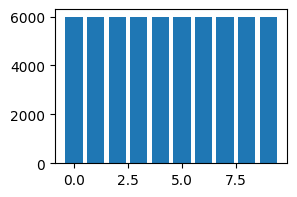

In [ ]:
## 추가코드
def label_Unique(data):
  tmp=np.unique(data, return_counts=True)
  print(tmp)
  plt.figure(figsize=(3,2))
  plt.bar(tmp[0],tmp[1])
  plt.show()
label_Unique(train_labels)


In [ ]:
test_images.shape


(10000, 28, 28)

In [ ]:
len(test_labels)

10000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


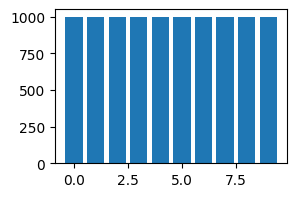

In [ ]:
###########
## 추가코드
############
label_Unique(test_labels)

## 3.데이터전처리
- 네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

In [ ]:
train_images[0].min(), train_images.max() # 정규화 x 확인 , 파이썬 정규화,표준화 하는 이유

(0, 255)

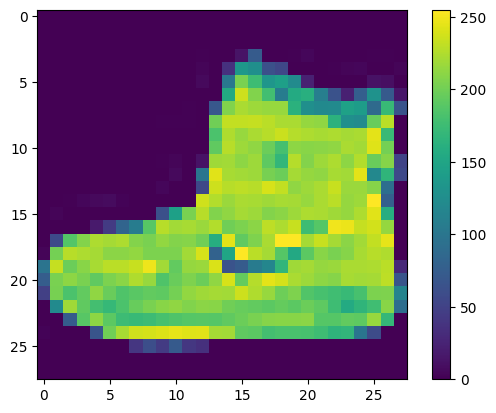

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
###########################3
## 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다.
# 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

train_images = train_images / 255.0
test_images = test_images / 255.0

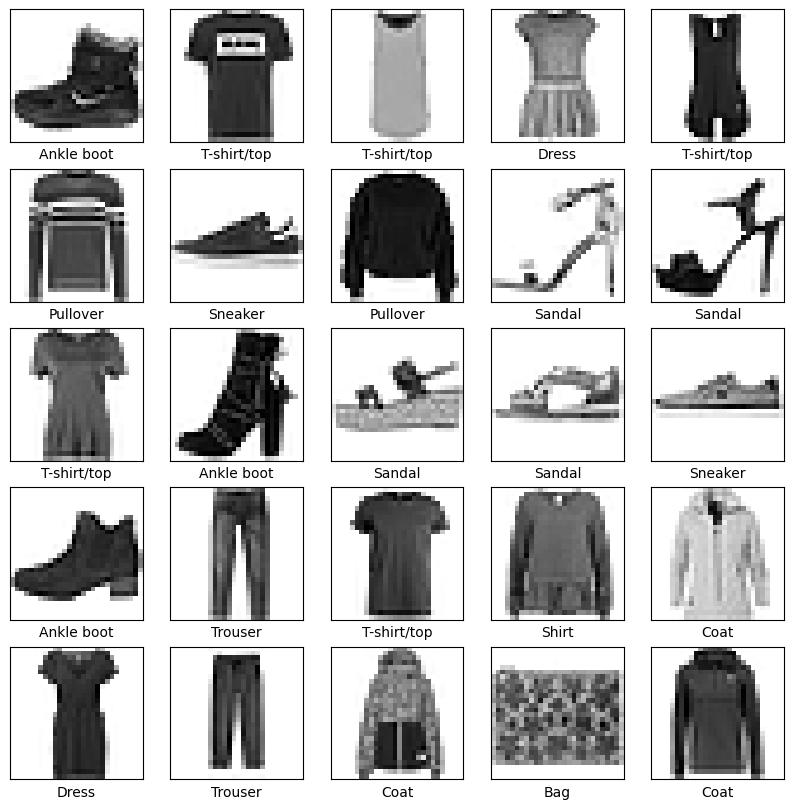

In [ ]:
############################3
## 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠.
### 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4.모델구성
- 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.
.


In [ ]:
########################

# 층 설정
# 신경망의 기본 빌딩 블록은 레이어 입니다.
# 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.
# 대부분 딥러닝은 간단한 층을 연결하여 구성됩니다.
# tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) # 반드시 softmax함수를 사용해야함. 원핫인코딩되어있어야함. 여기에 사용하지 않으면 모델컴파일 loss에 사용하면 됨
])


#############
# 모델 컴파일
# 모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됩니다.

# 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
# 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
# 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

model.compile(optimizer='adam',

               # 원핫인코딩을 컴파일하면서하자, 함수를 알아자 하자 from_logits=True
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 원핫인코딩을 컴파일하면서하자
              metrics=['accuracy'])




In [ ]:
#########
## 모델저장
###
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

hist=model.fit(train_images, train_labels,
               epochs=3,
               validation_data=(test_images, test_labels),callbacks=[checkpointer]
               ,verbose=1)  # verbose=1 이 기본이고, 실행결과 보여주는 옵션임, 0은 생략


Epoch 1/3
1874/1875 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.9002
Epoch 1: saving model to ./model/01-0.8749.hdf5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2683 - accuracy: 0.9002 - val_loss: 0.3580 - val_accuracy: 0.8749
Epoch 2/3
1865/1875 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.9049
Epoch 2: saving model to ./model/02-0.8799.hdf5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2572 - accuracy: 0.9049 - val_loss: 0.3361 - val_accuracy: 0.8799
Epoch 3/3
1862/1875 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9085
Epoch 3: saving model to ./model/03-0.8789.hdf5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2466 - accuracy: 0.9085 - val_loss: 0.3452 - val_accuracy: 0.8789


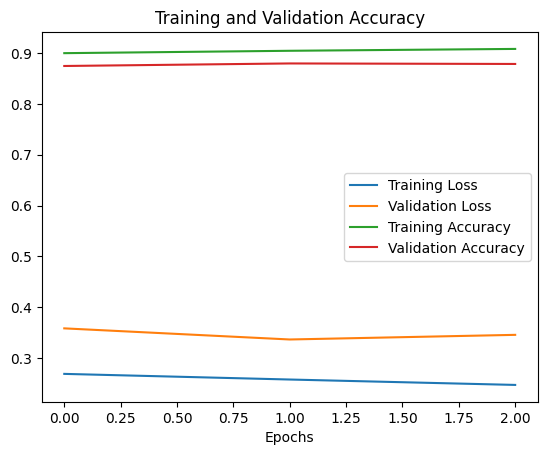

In [146]:
########################################33
### 추가
##########################################
# 학습 및 검증 손실 그래프
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')

# 학습 및 검증 정확도 그래프
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## 5.정확도평가
- 다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다
- 만들어진 모델의 레이어당 w,b를 이용한 계산 결과의 최종값이 test_label값과 같은가 (그 갯수를 파악하고/ 전체갯수 )

- 지금 이 자료는  10개의 카테고리중 한개 카테고리 맞추기(소프트맥스 활성화함수:   wx+b를 하고  시그모이드를 한 10개의 값을 다 더해서 각 값을 나눈값 )

In [147]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 2.4054 - accuracy: 0.1090 - 486ms/epoch - 2ms/step

Test accuracy: 0.10899999737739563


## 6.예측하기
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.
- y값을 원핫인코딩해서 넣으면 model.predict하면 됨
- y값을 원핫인코딩안하고 넣으면 model.prdict하면 안됨 tf.nn.softmax해야함.
   ==> 이코드의 이슈는 최종레이어의 softmax함수를 사용하지 않았기 때문에 예측할때 아래코드가 추가되어야 함.  
   
    probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [149]:
######################
## 최종 레이어에 softmax함수가 없었기 때문에 softmax함수를 추가하고 계산하는
##############
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


[0.11901283 0.07748238 0.1095467  0.12885997 0.04376892 0.12647323
 0.10240396 0.10410675 0.06134928 0.12699604] 1.0
----------------------------------------------------------------------------------------------------
yaht: Dress ...real: Ankle boot


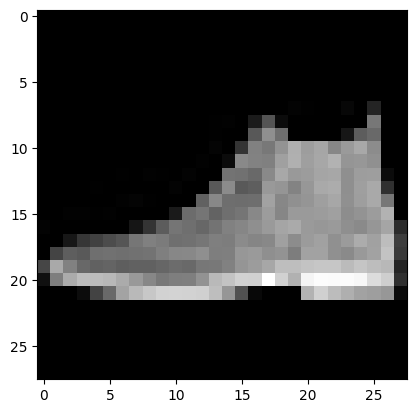

In [166]:
### 테스트 이미지의 첫번째 자료를 확인하고자함.
###
print(predictions[0], np.sum(predictions[0]))  # 값의 정확도가 맞는지 확인
print('-'*100)

bun=np.argmax(predictions[0])
yhat=class_names[bun]

print('yaht:',yhat, '...real:', class_names[test_labels[0]])
plt.imshow(test_images[0], cmap='gray')



In [155]:
########################################
### 추가
########################################
tmp=model.predict(test_images) #원핫인코딩으로 되어 있는 y값을 넣었을떄는 이렇게 예측함.
tmp[0], np.sum(tmp[0])

313/313 [==============================] - 1s 3ms/step


(array([ 0.30519867, -0.12398212,  0.2223183 ,  0.38469368, -0.69510853,
         0.36599806,  0.15489271,  0.17138423, -0.35744917,  0.3701233 ],
       dtype=float32),
 0.7980691)

In [171]:
###################################################
#### 추가 - 직접계산하는  정확도
#### 위의 예측하는 방법을 이용하면 정확도를 직접 구할수 있음
#####################################################
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

yhat=np.argmax(predictions,axis=1)  # 직접계산하여서 확인하고자함
um_correct = np.sum(yhat == test_labels)
um_correct/len(test_labels)  # 맞은갯수 /전체갯수

313/313 - 1s - loss: 2.4054 - accuracy: 0.1090 - 778ms/epoch - 2ms/step

Test accuracy: 0.10899999737739563
313/313 [==============================] - 1s 2ms/step


0.109

In [163]:
import pandas as pd
df=pd.DataFrame({'y':test_labels,
              'yhat':yhat,
              'bigo':test_labels==yhat})


df.head()

len(df[df['bigo']==True])/ len(df['bigo'])
df

,y,yhat,bigo
0,9,Dress,False
1,2,Dress,False
2,1,Dress,False
3,1,Dress,False
4,6,Dress,False
...,...,...,...
9995,9,Dress,False
9996,1,Dress,False
9997,8,Dress,False
9998,1,Dress,False


## [추가]
- 내 이미지를 넣어서 이 모델의 성능을 확인하고자함.
- 샘플로 앵클부츠 이미지를 넣어서 앵클부츠 이미지를 확인하고자함
- 앵클부츠는 9번이미지임

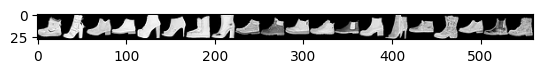

In [ ]:
## 직==
indices_of_9 = [i for i, label in enumerate(train_labels) if label == 9]
sample=indices_of_9[:20]

img=np.hstack(train_images[ sample  ])
plt.imshow(img, cmap='gray')

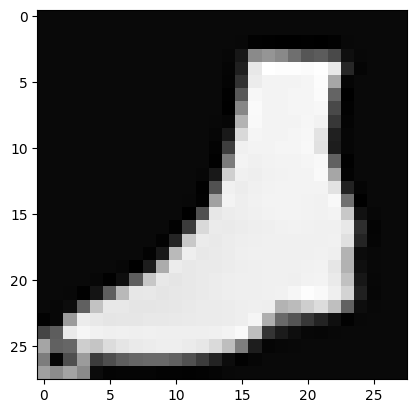

In [ ]:
from PIL import Image
img=Image.open('img.jpg').resize((28,28)).convert('L')
img=255-np.array(img)
img=img/255.
newimg=np.reshape(img, (1,28,28))
plt.imshow(img,cmap='gray')


In [92]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(newimg)
predictions

1/1 [==============================] - 0s 89ms/step


array([[0.07910314, 0.05279543, 0.08960236, 0.09244191, 0.0821965 ,
        0.13310514, 0.05992479, 0.09768579, 0.04443969, 0.26870525]],
      dtype=float32)

In [93]:
np.sum(predictions)

1.0

In [96]:
classBun=np.argmax(predictions[0])
classBun

9

In [97]:
class_names[classBun]

'Ankle boot'